# **DEEP LEARNING**

### **GROUP MEMBERS**


1.   DHAWAL TURKAR (202101040234)
2.   PRASAD LOKHANDE (202101040218)
3.   VIRAJ CHUDASAMA (202101040241)






## **Dataset**

The dataset used for this project is the "5 Flower Types Classification Dataset." It is a multiclass classification dataset containing images of five different types of flowers. The goal of this project is to build a CNN model to classify these flower images accurately.

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("l3llff/flowers")

print("Path to dataset files:", path)

100%|██████████| 228M/228M [00:04<00:00, 55.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/l3llff/flowers/versions/4


In [ ]:
!ls /root/.cache/kagglehub/datasets/l3llff/flowers/versions/4/flowers


astilbe		  calendula	    common_daisy  dandelion  rose	water_lily
bellflower	  california_poppy  coreopsis	  iris	     sunflower
black_eyed_susan  carnation	    daffodil	  magnolia   tulip


In [ ]:
path = "/root/.cache/kagglehub/datasets/l3llff/flowers/versions/4/flowers"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation
from keras.layers import Conv2D, MaxPooling2D, Flatten,Activation,Dense, Dropout, BatchNormalization

In [ ]:
tf.random.set_seed(5)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(rotation_range=10,
            rescale = 1./255,
            width_shift_range=0.1,
            height_shift_range=0.1,
            horizontal_flip=True,
            vertical_flip=False,
            zoom_range=0.1,
            shear_range=0.1,
            brightness_range=[0.8, 1.2],
            fill_mode='nearest',
            validation_split=0.2
            )

In [ ]:
trainimagedata = datagen.flow_from_directory(f"{path}",batch_size = 64, class_mode = 'categorical',target_size=(128,128),subset = 'training')
testimagedata = datagen.flow_from_directory(f"{path}",batch_size = 64, class_mode = 'categorical',target_size=(128,128),  subset = 'validation')

Found 12599 images belonging to 16 classes.
Found 3141 images belonging to 16 classes.


In [ ]:
labels = {value: key for key, value in trainimagedata.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : astilbe
1 : bellflower
2 : black_eyed_susan
3 : calendula
4 : california_poppy
5 : carnation
6 : common_daisy
7 : coreopsis
8 : daffodil
9 : dandelion
10 : iris
11 : magnolia
12 : rose
13 : sunflower
14 : tulip
15 : water_lily


In [ ]:
trainimagedata.class_indices
testimagedata.class_indices

{'astilbe': 0,
 'bellflower': 1,
 'black_eyed_susan': 2,
 'calendula': 3,
 'california_poppy': 4,
 'carnation': 5,
 'common_daisy': 6,
 'coreopsis': 7,
 'daffodil': 8,
 'dandelion': 9,
 'iris': 10,
 'magnolia': 11,
 'rose': 12,
 'sunflower': 13,
 'tulip': 14,
 'water_lily': 15}

In [ ]:
trainimagedata.image_shape
testimagedata.image_shape

(128, 128, 3)

In [ ]:
import os

In [ ]:
flower = os.listdir(f"{path}/tulip")
flower_dir = (f"{path}/tulip")

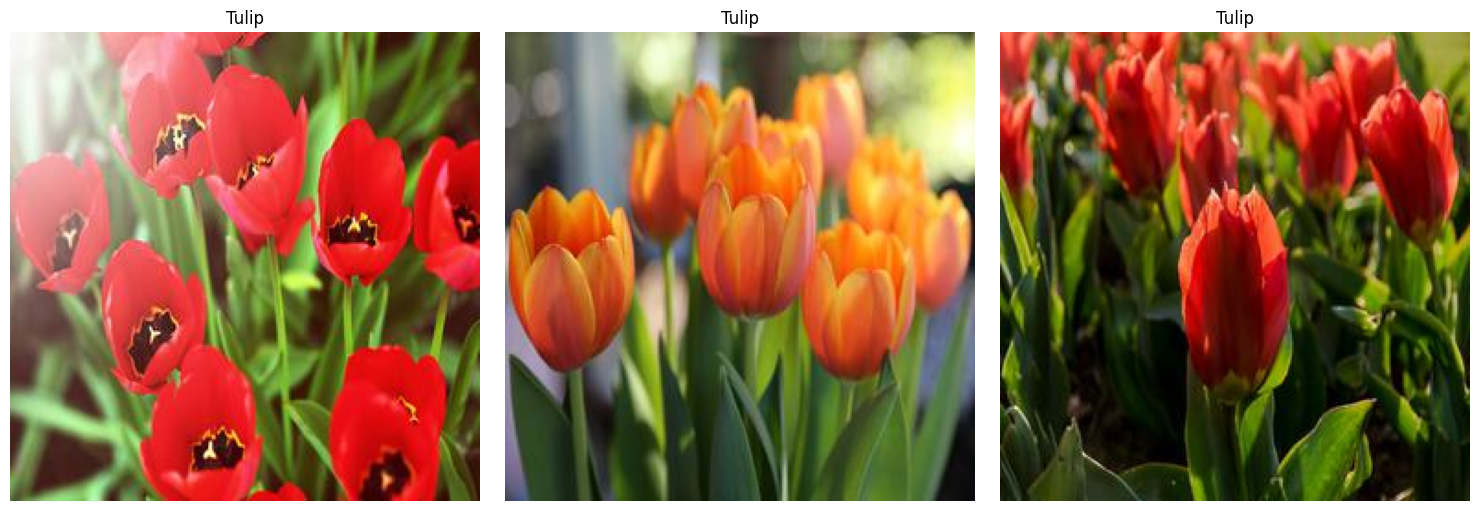

In [ ]:
import matplotlib.pyplot as plt
import os
import random

# Assuming 'flower_dir' is the directory containing the images
# List all image file names in the flower directory
flower_images = os.listdir(flower_dir)

# Randomly select 3 unique images
random_images = random.sample(flower_images, 3)

# Create a figure to display the images
plt.figure(figsize=(15, 5))  # Adjust figure size for a horizontal layout

# Loop to plot each randomly selected image
for i in range(3):
    plt.subplot(1, 3, i + 1)  # Create a 1x3 grid
    img_path = os.path.join(flower_dir, random_images[i])
    img = plt.imread(img_path)
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.title("Tulip")  # Set title for each image

# Adjust the layout and display the figure
plt.tight_layout()
plt.show()


In [ ]:
flower = os.listdir(f"{path}/sunflower")
flower_dir = (f"{path}/sunflower")

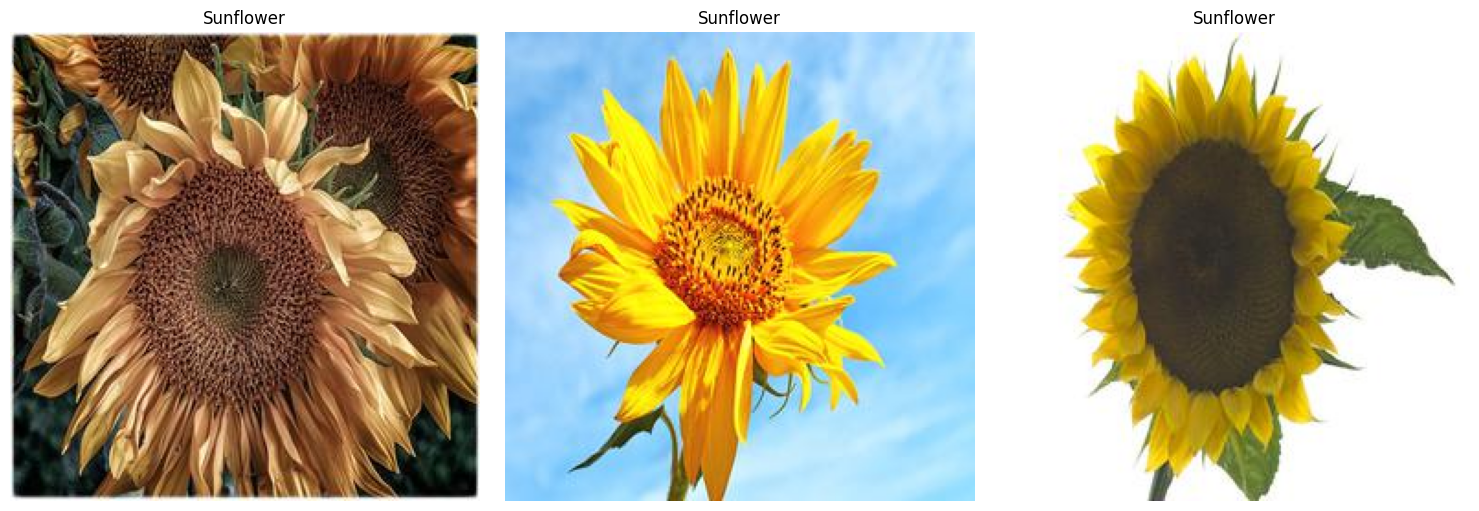

In [ ]:
import matplotlib.pyplot as plt
import os
import random

# Assuming 'flower_dir' is the directory containing the images
# List all image file names in the flower directory
flower_images = os.listdir(flower_dir)

# Randomly select 3 unique images
random_images = random.sample(flower_images, 3)

# Create a figure to display the images
plt.figure(figsize=(15, 5))  # Adjust figure size for a horizontal layout

# Loop to plot each randomly selected image
for i in range(3):
    plt.subplot(1, 3, i + 1)  # Create a 1x3 grid
    img_path = os.path.join(flower_dir, random_images[i])
    img = plt.imread(img_path)
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.title("Sunflower")  # Set title for each image

# Adjust the layout and display the figure
plt.tight_layout()
plt.show()



In [ ]:
# Model Architecture
model = tf.keras.models.Sequential()

# Conv Block 1
model.add(tf.keras.layers.Conv2D(32,(3,3), input_shape = trainimagedata.image_shape,activation = 'relu',padding = 'same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

# Conv Block 2
model.add(tf.keras.layers.Conv2D(16,(5,5),activation = 'relu',padding = 'same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

# Conv Block 3
model.add(tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',padding = 'same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(tf.keras.layers.Flatten())

# Fully connected Block 1
model.add(Dense(512, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

# Fully connected Block 2
model.add(Dense(256, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(units=16, activation = 'softmax'))

# Use learning_rate instead of lr
opt = Adam(learning_rate=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64, 64, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 16)          │          12,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32, 32, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 16)          │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16, 16, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │              

 Total params: 2,252,464 (8.59 MB)

 Trainable params: 2,250,800 (8.59 MB)

 Non-trainable params: 1,664 (6.50 KB)

In [ ]:
history = model.fit(trainimagedata, validation_data = testimagedata, epochs=25)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


197/197 ━━━━━━━━━━━━━━━━━━━━ 109s 481ms/step - accuracy: 0.2543 - loss: 2.5662 - val_accuracy: 0.0891 - val_loss: 3.9659
Epoch 2/25
197/197 ━━━━━━━━━━━━━━━━━━━━ 122s 423ms/step - accuracy: 0.4224 - loss: 1.7702 - val_accuracy: 0.1130 - val_loss: 4.8494
Epoch 3/25
197/197 ━━━━━━━━━━━━━━━━━━━━ 86s 427ms/step - accuracy: 0.4855 - loss: 1.5536 - val_accuracy: 0.2006 - val_loss: 3.4219
Epoch 4/25
197/197 ━━━━━━━━━━━━━━━━━━━━ 85s 422ms/step - accuracy: 0.5142 - loss: 1.4386 - val_accuracy: 0.3091 - val_loss: 2.4470
Epoch 5/25
197/197 ━━━━━━━━━━━━━━━━━━━━ 142s 422ms/step - accuracy: 0.5535 - loss: 1.3188 - val_accuracy: 0.3563 - val_loss: 2.0887
Epoch 6/25
197/197 ━━━━━━━━━━━━━━━━━━━━ 141s 420ms/step - accuracy: 0.5747 - loss: 1.2536 - val_accuracy: 0.3938 - val_loss: 1.9002
Epoch 7/25
197/197 ━━━━━━━━━━━━━━━━━━━━ 85s 421ms/step - accuracy: 0.5875 - loss: 1.2143 - val_accuracy: 0.5365 - val_loss: 1.3762
Epoch 8/25
197/197 ━━━━━━━━━━━━━━━━━━━━ 85s 415ms/step - accuracy: 0.6214 - loss: 1.1213 -

In [ ]:
test_loss, test_accuracy = model.evaluate(testimagedata)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

50/50 ━━━━━━━━━━━━━━━━━━━━ 16s 328ms/step - accuracy: 0.6832 - loss: 0.9691
Test Loss: 0.9822742938995361
Test Accuracy: 0.676217794418335


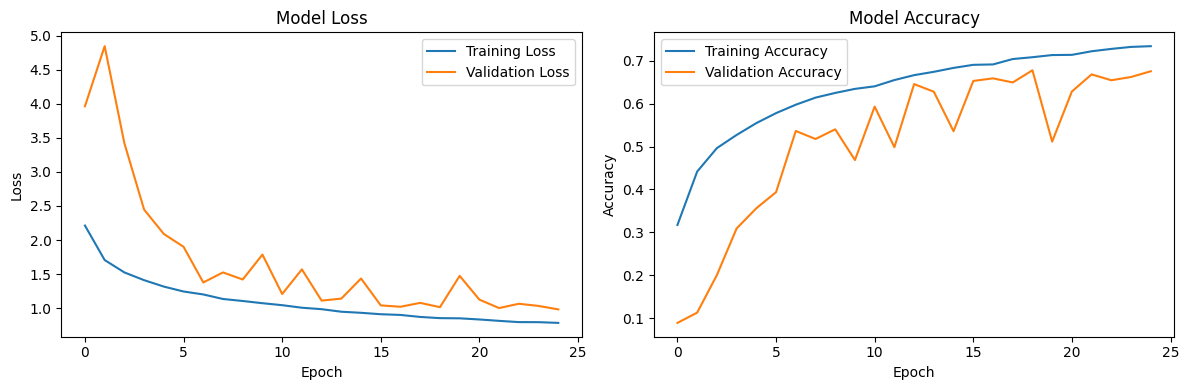

In [ ]:
plt.figure(figsize=(12, 4))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict class labels for the test dataset
test_predictions = model.predict(testimagedata)

test_pred_labels = np.argmax(test_predictions, axis=1)

true_labels = testimagedata.classes

confusion_mat = confusion_matrix(true_labels, test_pred_labels)
print("Confusion Matrix:\n", confusion_mat)

50/50 ━━━━━━━━━━━━━━━━━━━━ 19s 353ms/step
Confusion Matrix:
 [[ 6  7  4  9 11  6 19 14 12 15  7  8 14  4  4  7]
 [ 8  8  6 14  6  8 17 13  8 22 15  7 16 10  9  7]
 [ 7  9 14 10 13  7 21 15 12 31 11  9 14 12  9  6]
 [ 6  5  8  5 10 10 17 18 14 20  7 12 25 12 18  8]
 [ 7 16 12  9 15  7 17  9 11 30 11 14 14 13 14  5]
 [ 8  6  8  9 12  9 21 12 17 20 12 12 17  6  8  7]
 [12  7  8 15 13  7 20 12  7 22  3 12 24 17 14  3]
 [16  9  6  8 14 10 17 15 15 28  7 10 19 11 13 11]
 [ 9 12 12 10 15  6 17 13 11 24  6  8 20 15 10  6]
 [10  9 14 12 13 10 19  8 15 31 10 10 15 14  9 11]
 [ 8 12  9 11 10  6 21 12 18 33 10 14 14 13  9 10]
 [10  6  9 21 14  8 20 13 12 26  7 11 14 15 15  8]
 [ 9 13 10 10 11  7 18 16 13 26 11 14 15 14  4  8]
 [ 7 13 12 16 15  9 17  7 14 27  8  6 20 14 13  7]
 [ 7  8 12 20  6  6 20 12 10 19 12 18 19 17 14  9]
 [11  6 10  9 14  5 20 12 12 17 10 14 18 14 13 11]]


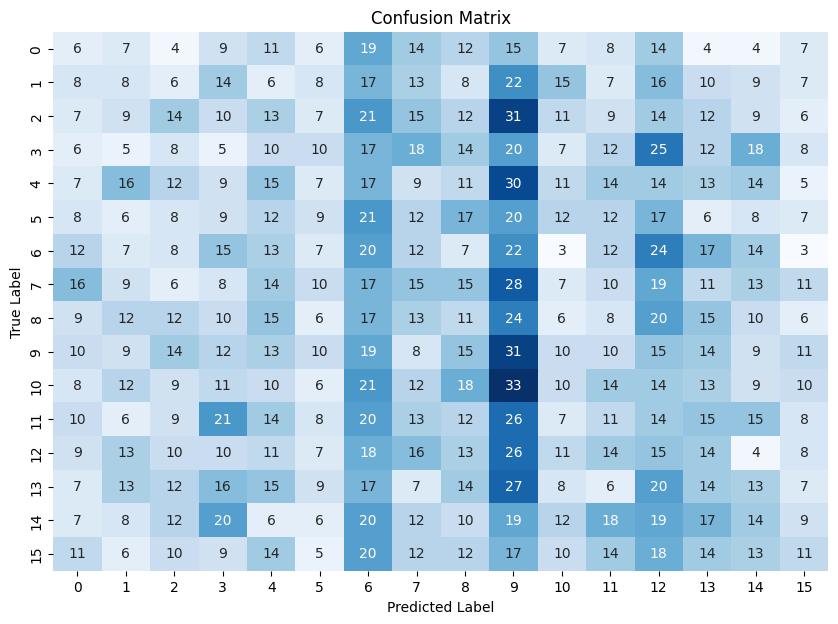

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming true_labels and test_pred_labels are already defined

# Calculate confusion matrix
confusion_mat = confusion_matrix(true_labels, test_pred_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False)

# Add labels and titles
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Save the trained model
model.save("flower_classification_model.keras")

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('/content/flower_classification_model.keras')
print("Model loaded successfully!")


Model loaded successfully!


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 24 variables whereas the saved optimizer has 46 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
# Class labels from your dataset
class_labels = [
    "Astilbe", "Bellflower", "Calendula", "Coreopsis", "Sunflower",
    "Black-Eyed Susan", "Carnation", "Daffodil", "Magnolia", "Tulip"
]

In [ ]:
import os
import random
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Define the path to the dataset directory
dataset_path = f"{path}"

# Choose a random class folder
random_class = random.choice(os.listdir(f"{path}"))
class_folder = os.path.join(f"{path}", random_class)

# Select a few random images from the chosen class
test_images = random.sample(os.listdir(class_folder), 3)

# Preprocess test images
def preprocess_image(img_path, target_size=(224, 224)):
    img = load_img(img_path, target_size=target_size)  # Resize image
    img_array = img_to_array(img) / 255.0  # Normalize pixel values
    return img_array

# Load and preprocess selected test images
test_data = np.array([preprocess_image(os.path.join(class_folder, img)) for img in test_images])


In [ ]:
# Predict class probabilities
predictions = model.predict(testimagedata)

# Get the predicted class indices
predicted_classes = [class_labels[np.argmax(pred)] for pred in predictions]
print("Predicted classes:", predicted_classes)

50/50 ━━━━━━━━━━━━━━━━━━━━ 19s 376ms/step
Predicted classes: ['iris', 'sunflower', 'dandelion', 'calendula', 'rose', 'coreopsis', 'daffodil', 'black_eyed_susan', 'black_eyed_susan', 'sunflower', 'rose', 'dandelion', 'sunflower', 'sunflower', 'bellflower', 'calendula', 'black_eyed_susan', 'iris', 'tulip', 'astilbe', 'common_daisy', 'daffodil', 'common_daisy', 'california_poppy', 'coreopsis', 'water_lily', 'carnation', 'sunflower', 'california_poppy', 'coreopsis', 'california_poppy', 'dandelion', 'coreopsis', 'tulip', 'astilbe', 'dandelion', 'water_lily', 'astilbe', 'black_eyed_susan', 'daffodil', 'common_daisy', 'dandelion', 'calendula', 'tulip', 'calendula', 'bellflower', 'water_lily', 'sunflower', 'astilbe', 'rose', 'dandelion', 'california_poppy', 'dandelion', 'carnation', 'daffodil', 'sunflower', 'iris', 'magnolia', 'common_daisy', 'coreopsis', 'dandelion', 'coreopsis', 'common_daisy', 'dandelion', 'daffodil', 'dandelion', 'sunflower', 'dandelion', 'dandelion', 'common_daisy', 'cale

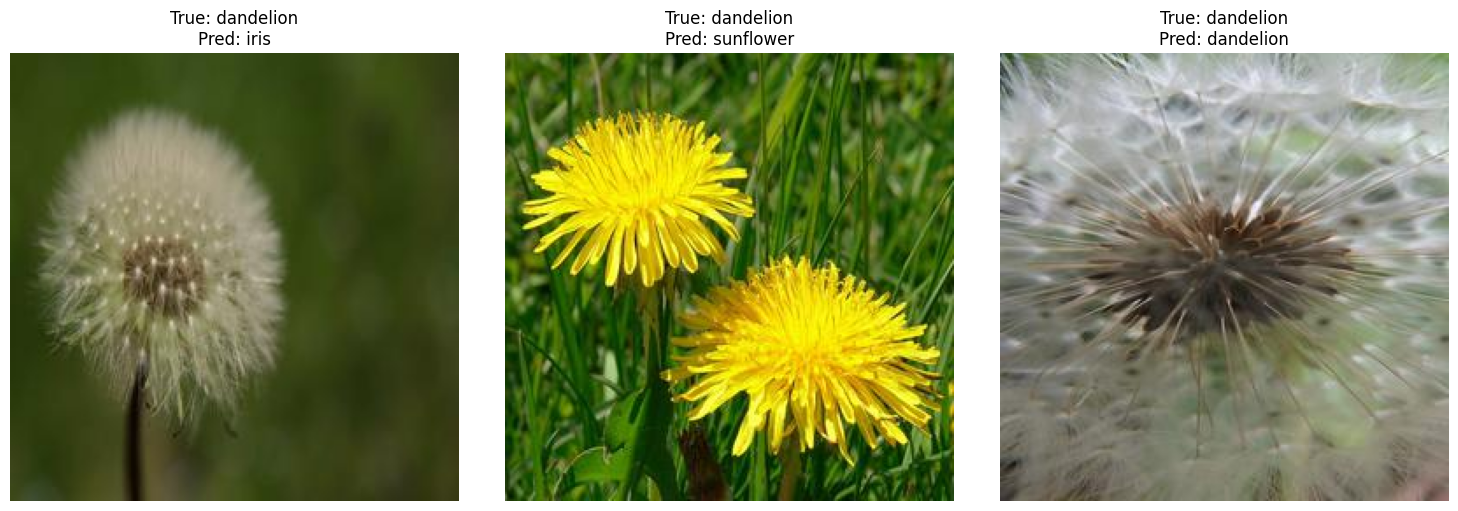

In [ ]:
import matplotlib.pyplot as plt

# Display the images with predictions
plt.figure(figsize=(15, 5))
for i, img_name in enumerate(test_images):
    img_path = os.path.join(class_folder, img_name)
    img = load_img(img_path)  # Load the image for display
    plt.subplot(1, 3, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"True: {random_class}\nPred: {predicted_classes[i]}")
plt.tight_layout()
plt.show()


# **Conclusion:**

In this project, a CNN model was successfully implemented and trained to classify flower images into five different categories. The model achieved a test accuracy of 0.6390 after 10 epochs of training. Further hyperparameter tuning and optimization are recommended to improve performance. This project demonstrates the importance of careful experimentation with hyperparameters and data augmentation techniques in building effective image classification models.